## k-means clustering

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we want to generate random sample data. Create a 3-D array with $width = 1$, $height = 1000$ and two channels. Fill it with random values. Use $np.random.randint(x,y,z)$.

In [4]:
height = 1000 
width = 1
channels = 2
img = np.random.rand(height, width, channels)

Plot the initial random distribution. Take care of the two channels!!!!

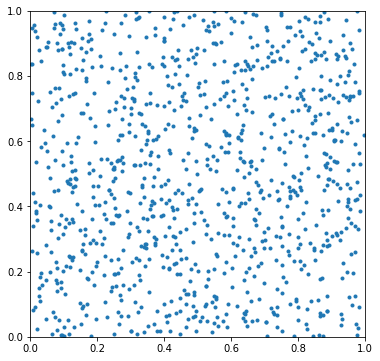

In [7]:
figure(figsize(6,6))
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.plot(img[:, :, 0], img[:, :, 1], '.')
plt.show()

We define an empty dictionary 'clusters'. We want to have six clusters and assign an empty list to each of the clusters where we afterwards store the calculated values.

https://www.tutorialspoint.com/python/python_dictionary.htm $->$ more about dictionaries.

In [9]:
clusters = {}
k = 6  
for i in range(0, k):
    clusters[i] = list()

### The k-means algorithm consists of three subsequent steps.
Step 1: Assign all pixels to random clusters. 
Therefore, generate a random number between one and six with $np.random.randint()$ and add the specific entry of the sample data to the list of that random cluster. You can add an entry to a list by using list.append(). You can access the specific dictionary entry by $dictionary[i]$ where $i$ is the custer in our case.

In [11]:
for y in range(0, height):
    for x in range(0, width):
        clusterIndex = np.random.randint(0, k)
        clusters[clusterIndex].append(img[y, x])

We create a dictionary 'colors' with 6 entrys - every cluster has a different color.
Afterwards we plot the color distribution. A Python list can be converted into an array with the command $numpy.asarray()$.

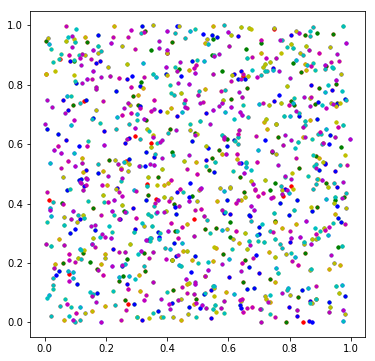

In [13]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm'}  
for key in clusters:
    plt.plot(np.asarray(clusters[key])[:, 0], np.asarray(clusters[key])[:, 1], colors[key] + '.')
plt.show()

Define a maximum iteration number $maxIter$ and implement the algorithm.

Step 2: Mean vector computation of each cluster

Step 3: Reassign each vector to the cluster with the closest mean vector

Repeat until maxIter ist reached.


In [30]:
# set iter number
maxNumberOfIterations = 4

# for loop to iterate
for i in range(0, maxNumberOfIterations):
    # compute means for every cluster
    means = np.empty([k, channels])
    for key in clusters:
        means[key] = np.mean(np.asarray(clusters[key]),0)

    # rearrange clusters
    #   First - set up a new empty clusterlist
    newClusters = {}
    for j in range(0, k):
        newClusters[j] = list()

    # Find the closest mean (euclididan distance) for every data point 
    for y in range(0, height):
        for x in range(0, width):
            bestCluster = 0
            # set maxValue of given format
            lowestDifference = sys.float_info.max
            pixelValue = img[y, x]

            # compute distance to means of all clusters and save the best cluster 
            for key in clusters:
                distance = np.linalg.norm(means[key] - pixelValue)
                if distance < lowestDifference:
                    lowestDifference = distance
                    bestCluster = key
                newClusters[bestCluster].append(img[y, x])
    # save the new distribution in clusters
    clusters = newClusters

Plot the clustered distribution. Also plot the resulting mean vectors as '*'

We want to use Python dictionaries to store key-pair values such as a cluster index and a list of vectors. A Python list can be converted into an array with the command numpy.asarray

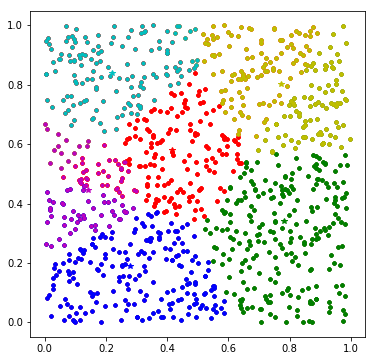

In [31]:
for key in clusters:
    plt.plot(np.asarray(clusters[key])[:, 0], np.asarray(clusters[key])[:, 1], colors[key] + '.')
    plt.plot(means[key, 0], means[key, 1], colors[key] + '*')
plt.show()